## Logistic Regression Python Implementation

In [1]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from yellowbrick.model_selection import FeatureImportances
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
from mindsdb_native import MySqlDS

S3 Datasource is not available by default. If you wish to use it, please install mindsdb_native[extra_data_sources]
Microsoft SQL Server Datasource is not available by default. If you wish to use it, please install mindsdb_native[extra_data_sources]
Athena Datasource is not available by default. If you wish to use it, please install mindsdb_native[extra_data_sources]
Google Cloud Storage Datasource is not available by default. If you wish to use it, please install mindsdb_native[extra_data_sources]


DEBUG:mindsdb-logger-core-logger---:C:\Users\Simran\anaconda3\lib\site-packages\mindsdb_native\libs\helpers\general_helpers.py:125 - MindsDB is up to date!



In [3]:
# mysql data source
mysql_ds = MySqlDS(query="SELECT * FROM covid_flu_data", user="root", password="pass", database="world", port=3306)

In [4]:
#separating data from target
covid_data=mysql_ds[mysql_ds.columns[:20]]
covid_target=mysql_ds[mysql_ds.columns[20]]

In [5]:
#displays the first 5 rows
covid_data.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1
2,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
3,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1
4,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1


In [6]:
#displays n random rows
covid_target.sample(n=5)

20482    FLU
41460    FLU
42984    FLU
20258    FLU
29117    FLU
Name: DIAGNOSE, dtype: object

In [7]:
# splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(covid_data,covid_target,test_size=0.5)

In [8]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)

In [9]:
#fitting the model
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [10]:
#calculates the prediction score of the model
model.score(x_test,y_test)

0.9297700994286229

In [11]:
#storing the predicted result for future use
y_pred=model.predict(x_test)
y_pred

array(['COVID', 'FLU', 'FLU', ..., 'FLU', 'COVID', 'ALLERGY'],
      dtype=object)

In [12]:
# returns Probability estimates.
model.predict_proba(x_test)

array([[3.69272177e-11, 4.11561306e-10, 5.46532089e-01, 4.53467911e-01],
       [5.54147520e-13, 3.55616850e-12, 1.59527674e-05, 9.99984047e-01],
       [1.65579863e-06, 3.41164213e-07, 7.51368493e-08, 9.99997928e-01],
       ...,
       [1.37127435e-02, 8.22953112e-03, 5.51357643e-03, 9.72544149e-01],
       [3.32609415e-11, 3.48925064e-10, 5.36426361e-01, 4.63573639e-01],
       [9.99999993e-01, 2.18836571e-09, 3.83328307e-12, 5.02839509e-09]])

In [13]:
#The 4 different classes in this dataset
classes=y_test.unique()
classes

array(['FLU', 'ALLERGY', 'COVID', 'COLD'], dtype=object)

In [14]:
col_names=list(covid_data.columns)

In [15]:
# To evaluate the performance of a classification model
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 8166,    46,     8,    21],
       [  197,   258,    13,    32],
       [    8,    11,   612,   338],
       [   60,   116,   711, 11630]], dtype=int64)

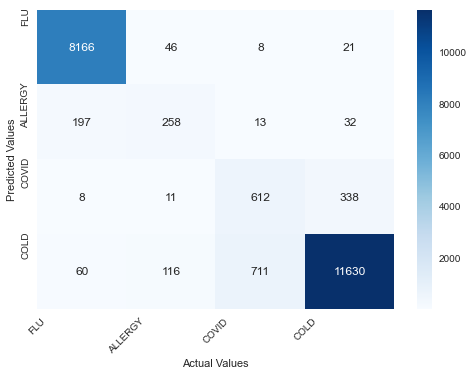

In [16]:
#visualising confusion matrix
sns.heatmap(cm, annot=True,fmt='g',cmap='Blues')
width = np.arange(len(classes))
plt.xticks(width, classes, rotation=45)
plt.yticks(width, classes)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [17]:
precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall:    {}'.format(recall))
print('fscore:    {}'.format(fscore))
print('support:   {}'.format(support))

precision: [0.96856838 0.59860789 0.45535714 0.96747359]
recall:    [0.99089916 0.516      0.63157895 0.92913637]
fscore:    [0.97960653 0.55424275 0.52918288 0.94791752]
support:   [ 8241   500   969 12517]


In [18]:
score(y_test, y_pred,labels=['ALLERGY','COLD', 'COVID', 'FLU'])

(array([0.96856838, 0.59860789, 0.45535714, 0.96747359]),
 array([0.99089916, 0.516     , 0.63157895, 0.92913637]),
 array([0.97960653, 0.55424275, 0.52918288, 0.94791752]),
 array([ 8241,   500,   969, 12517], dtype=int64))

## Logistic Regression Feature Importance

##### Important feature of each class

FeatureImportances(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000226BC533EE0>,
                   estimator=LogisticRegression(max_iter=1000), stack=True)

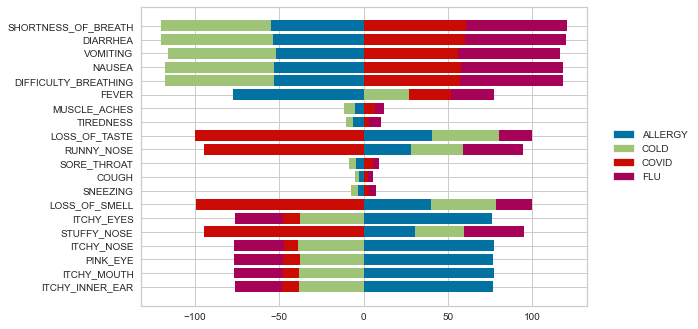

In [19]:
#The interpretation of the importance of coeficients depends on the model
viz = FeatureImportances(model, stack=True, relative=True)
viz.fit(x_train,y_train)

In [20]:
importance = model.coef_[0]

In [21]:
feat_imp=pd.DataFrame(col_names,columns=["feature"])
feat_imp['importance']=pow(math.e,importance)
feat_imp.sort_values(by=["importance"],ascending=False)

,feature,importance
16,ITCHY_MOUTH,3.505808e+33
14,ITCHY_NOSE,2.611696e+33
19,PINK_EYE,2.163181e+33
17,ITCHY_INNER_EAR,1.904901e+33
15,ITCHY_EYES,1.281195e+33
12,LOSS_OF_TASTE,3.667694e+17
13,LOSS_OF_SMELL,1.848059e+17
5,STUFFY_NOSE,1.172411e+13
4,RUNNY_NOSE,1.262496e+12
0,COUGH,5.402111e-02


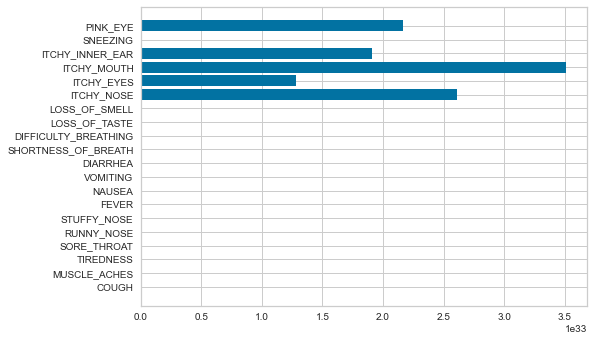

In [22]:
fig, ax = plt.subplots()
ax.barh(feat_imp['feature'],feat_imp['importance'])
plt.show()